In [1]:
from bs4 import BeautifulSoup as bs

import requests

import nltk

import matplotlib.pyplot as plt

In [2]:
import time

In [83]:
from nltk.corpus import stopwords

In [79]:
url = 'http://www.newxue.com/baike/12711369245915.html'

target_list = []
for epoch in range(5):
    res = requests.get(url)
    
    soup = bs(res.text, 'lxml')
    
    test = soup.select('p')
    
    for i in range(1, len(test)-9):
        target_list.append(test[i].text)
    
    url = soup.select('p.nextpage a')[0]["href"]
    
    time.sleep(10)

In [89]:
target_list[:5]

["ELIZABETH passed the chief of the night in her sister's room, and in the morning had the pleasure of being able to send a tolerable answer to the enquiries which she very early received from Mr. Bingley by a housemaid, and some time afterwards from the two elegant ladies who waited on his sisters. In spite of this amendment, however, she requested to have a note sent to Longbourn, desiring her mother to visit Jane, and form her own judgment of her situation. The note was immediately dispatched, and its contents as quickly complied with. Mrs. Bennet, accompanied by her two youngest girls, reached Netherfield soon after the family breakfast.",
 "Had she found Jane in any apparent danger, Mrs. Bennet would have been very miserable; but being satisfied on seeing her, that her illness was not alarming, she had no wish of her recovering immediately, as her restoration to health would probably remove her from Netherfield. She would not listen therefore to her daughter's proposal of being ca

In [92]:
target = ''.join(target_list)

In [84]:
stop_words = stopwords.words('english')

In [94]:
words = nltk.word_tokenize(target)

In [98]:
for i in stop_words:
    while True:
        try:
            words.remove(str(i))
        except:
            pass
        
        if i not in words:
            break

In [114]:
for x in words:
    while True:
        if x.isalpha() == False:
            words.remove(str(x))
            if x not in words:
                break
        else:
            break

In [118]:
stop_words_upp = []
for i in stop_words:
    stop_words_upp.append(i.upper())

In [120]:
for i in stop_words_upp:
    while True:
        try:
            words.remove(str(i))
        except:
            pass
        
        if i not in words:
            break

In [123]:
freq = nltk.FreqDist(words)

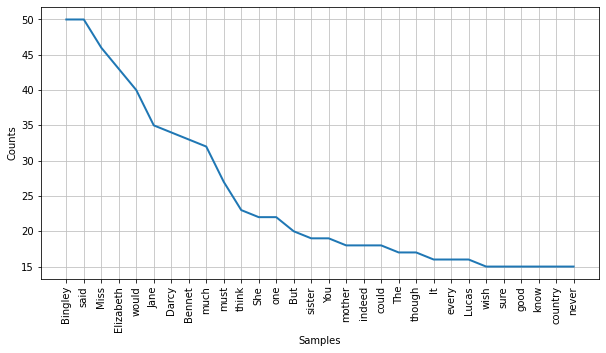

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [128]:
fig, ax = plt.subplots(figsize = (10, 5))
freq.plot(30)

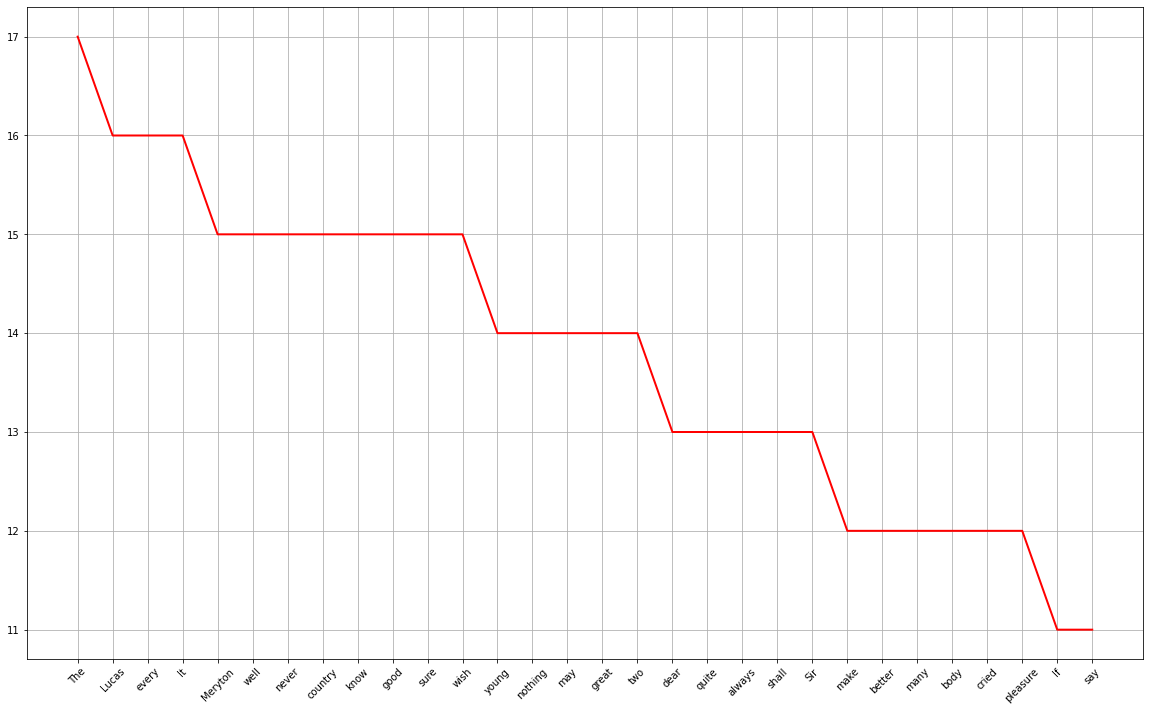

In [134]:
target_dict = {}
for x, y in freq.items():
    target_dict[str(x)] = y
    
target_dict = dict(sorted(target_dict.items(),
                         key = lambda x : x[1]))

target_x = list(target_dict.keys())[len(target_dict) - 50 : len(target_dict) - 20]
target_y = list(target_dict.values())[len(target_dict) - 50 :len(target_dict) - 20]

fig, ax = plt.subplots(figsize = (20, 12))
plt.xticks(rotation = 45)
plt.grid()

plt.plot(list(reversed(target_x)), 
         list(reversed(target_y)), lw = 2, color = 'red')

plt.savefig('result1.jpg')

plt.show()